In [1]:
## import libraries
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector, Bidirectional, CuDNNLSTM
import matplotlib.pyplot as plt
#import os
import tensorflow as tf
from keras.regularizers import l2

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
n_step = 9

In [4]:
def split(data, depth):
    dataset = data
    depth = depth
    X = np.zeros([int(depth), n_step, 3])
    Y = np.zeros([int(depth), n_step, 3])
    c = 0
    d = 0
    
    for i in range(int(depth)):
        for j in range(n_step):
            if d < dataset.shape[0]:
                X[i,j,:] = dataset[d, c:c+3]
                Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
                
                if ((c+3*n_step+3) != (dataset.shape[1])):
                    c +=3
                else:
                    c = 0
                    d += 1
        if (c-3) > 0:
            c = (c - 3*n_step + 3)
        else:
            c = c
            
    return X, Y

In [6]:
dataset = pd.read_csv('./datasets/prediction/test.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(4000, 147)

In [7]:
maxlen_train = dataset.shape[1]+(n_step-1)*3
maxlen_train

171

In [8]:
dataset = sequence.pad_sequences(dataset, maxlen=maxlen_train, padding='post', dtype='float32')
dataset.shape

(4000, 171)

In [9]:
depth_train = (int(dataset.shape[1]/3)+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows

In [10]:
x_train, y_train = split(data=dataset, depth=depth_train)

In [11]:
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(RepeatVector(x_train.shape[1]))
model.add(CuDNNLSTM(256, return_sequences=True ,activity_regularizer=l2(0.01)))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 256)               267264    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 9, 256)            0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 9, 256)            526336    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 3)              771       
Total params: 794,371
Trainable params: 794,371
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(x_train, y_train, batch_size=20000, epochs=500, shuffle=True)

Epoch 1/500
160000/160000 [==============================] - 2s 10us/step - loss: 10.5661 - acc: 0.7521
Epoch 2/500
160000/160000 [==============================] - 2s 10us/step - loss: 8.0248 - acc: 0.6921
Epoch 3/500
160000/160000 [==============================] - 2s 10us/step - loss: 6.8673 - acc: 0.7199
Epoch 4/500
160000/160000 [==============================] - 2s 10us/step - loss: 6.4513 - acc: 0.7440
Epoch 5/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.6379 - acc: 0.8322
Epoch 6/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.2474 - acc: 0.7675
Epoch 7/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.9984 - acc: 0.8190
Epoch 8/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.8945 - acc: 0.8293
Epoch 9/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.7873 - acc: 0.8206
Epoch 10/500
160000/160000 [==============================] - 2s 10us/st

160000/160000 [==============================] - 2s 10us/step - loss: 4.6031 - acc: 0.8800
Epoch 80/500
160000/160000 [==============================] - 2s 11us/step - loss: 4.5094 - acc: 0.8597
Epoch 81/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.4700 - acc: 0.8309
Epoch 82/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5118 - acc: 0.8882
Epoch 83/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6051 - acc: 0.8885
Epoch 84/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.7728 - acc: 0.8586
Epoch 85/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6007 - acc: 0.8568
Epoch 86/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5839 - acc: 0.8670
Epoch 87/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.8598 - acc: 0.8814
Epoch 88/500
160000/160000 [==============================] - 2s 10us/step - 

160000/160000 [==============================] - 2s 10us/step - loss: 4.6008 - acc: 0.8501
Epoch 156/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6020 - acc: 0.8523
Epoch 157/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5532 - acc: 0.8387
Epoch 158/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5296 - acc: 0.7997
Epoch 159/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5165 - acc: 0.8562
Epoch 160/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6211 - acc: 0.8762
Epoch 161/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.6571 - acc: 0.8594
Epoch 162/500
160000/160000 [==============================] - 2s 10us/step - loss: 6.7495 - acc: 0.7919
Epoch 163/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.8627 - acc: 0.7873
Epoch 164/500
160000/160000 [==============================] - 2s 10u

160000/160000 [==============================] - 2s 10us/step - loss: 4.5972 - acc: 0.8715
Epoch 233/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.4263 - acc: 0.8595
Epoch 234/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.4531 - acc: 0.8732
Epoch 235/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3847 - acc: 0.9005
Epoch 236/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3718 - acc: 0.9048
Epoch 237/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6677 - acc: 0.8867
Epoch 238/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.0923 - acc: 0.8643
Epoch 239/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.7940 - acc: 0.8712
Epoch 240/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5222 - acc: 0.8463
Epoch 241/500
160000/160000 [==============================] - 2s 10u

160000/160000 [==============================] - 2s 10us/step - loss: 4.3695 - acc: 0.8524
Epoch 310/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3776 - acc: 0.8866
Epoch 311/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3564 - acc: 0.8972
Epoch 312/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3497 - acc: 0.9023
Epoch 313/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3466 - acc: 0.9049
Epoch 314/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3380 - acc: 0.9022
Epoch 315/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3713 - acc: 0.9063
Epoch 316/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6774 - acc: 0.8814
Epoch 317/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.4773 - acc: 0.8899
Epoch 318/500
160000/160000 [==============================] - 2s 10u

160000/160000 [==============================] - 2s 10us/step - loss: 4.3606 - acc: 0.8654
Epoch 387/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.3757 - acc: 0.8047
Epoch 388/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.4999 - acc: 0.8776
Epoch 389/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.9013 - acc: 0.8659
Epoch 390/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5254 - acc: 0.8772
Epoch 391/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6250 - acc: 0.8662
Epoch 392/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.4855 - acc: 0.8542
Epoch 393/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5434 - acc: 0.8353
Epoch 394/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5109 - acc: 0.8375
Epoch 395/500
160000/160000 [==============================] - 2s 10u

160000/160000 [==============================] - 2s 10us/step - loss: 8.1495 - acc: 0.7674
Epoch 463/500
160000/160000 [==============================] - 2s 10us/step - loss: 6.2226 - acc: 0.7347
Epoch 464/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.4165 - acc: 0.7478
Epoch 465/500
160000/160000 [==============================] - 2s 10us/step - loss: 5.1081 - acc: 0.7964
Epoch 466/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.9496 - acc: 0.7591
Epoch 467/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.7309 - acc: 0.8443
Epoch 468/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.6024 - acc: 0.8776
Epoch 469/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5541 - acc: 0.8466
Epoch 470/500
160000/160000 [==============================] - 2s 10us/step - loss: 4.5198 - acc: 0.8997
Epoch 471/500
160000/160000 [==============================] - 2s 10u

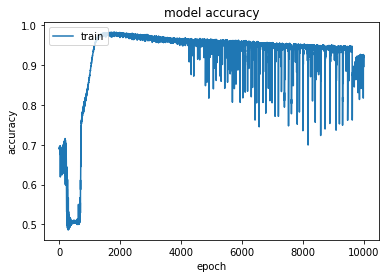

In [15]:
# plot accuracy history
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
np.set_printoptions(suppress=True)

In [57]:
num = 100000

In [58]:
print(x_train[num,:,:])
print(y_train[num,:,:])

[[ 79.05719757 291.78799438  43.17290115]
 [ 81.14900208 280.02999878  43.44520187]
 [ 86.39649963 248.03300476  43.47230148]
 [ 92.77179718 198.31100464  38.52529907]
 [ 93.90190125 188.16299438  36.63280106]
 [ 94.63300323 179.28599548  34.44400024]
 [ 95.5802002  168.45700073  32.28730011]
 [ 97.32279968 141.70700073  22.85779953]
 [ 99.23390198 104.69799805   7.88652992]]
[[99.28179932 96.42520142  3.09517002]
 [98.90709686 54.27679825 15.10990047]
 [98.69059753 47.89300156 17.88400078]
 [99.16470337 46.1548996  18.34029961]
 [98.91790009 39.77349854 20.40509987]
 [98.30449677 26.6406002  24.14769936]
 [97.14910126  7.98165989 27.32320023]
 [96.64430237  1.36758995 28.0618    ]
 [96.17299652 -4.94702005 28.3362999 ]]


In [63]:
y_pred = model.predict(x_train[num,:,:].reshape(1,9,3), verbose=1)
print(y_pred)

1/1 [==============================] - 0s 14ms/step
[[[96.80521    86.71048     5.5878773 ]
  [96.59523    60.11667     9.335817  ]
  [99.49626    46.850967   19.588676  ]
  [98.49679    46.209675   15.962525  ]
  [95.96532    40.47033    17.944061  ]
  [96.257706   24.488686   24.29489   ]
  [97.0939      9.371353   27.84031   ]
  [95.987045    0.02368164 28.411465  ]
  [93.60936    -4.6476345  27.400808  ]]]


In [64]:
error = y_train[num,:,:].reshape(1,9,3)-y_pred
error

array([[[ 2.47659302,  9.71472168, -2.49270725],
        [ 2.31186676, -5.83987045,  5.77408314],
        [-0.80566406,  1.04203415, -1.70467567],
        [ 0.66791534, -0.05477524,  2.37777424],
        [ 2.95258331, -0.69683075,  2.46103859],
        [ 2.04679108,  2.1519146 , -0.14719009],
        [ 0.05519867, -1.38969326, -0.51710892],
        [ 0.65725708,  1.34390831, -0.34966469],
        [ 2.56363678, -0.29938555,  0.93549156]]])

In [61]:
#model.save('./saved model/20200516/prediction_all_not_fixed')